# Decision Tree Model to Predict House Prices

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [11]:
df = pd.read_csv('house_prices.csv')
df.head()

,Area,Bedrooms,Bathrooms,Location,Age,Garage,Price
0,3774,4,2,Location3,23.0,0,814142.617200
1,4107,2,2,Location3,46.0,0,836259.082065
2,1460,3,3,Location2,113.0,1,296721.573960
3,1894,5,2,NaN,30.0,0,399099.591046
4,1730,3,2,Location5,67.0,0,441862.941002


## Data Preprocessing and Exploratory Data Analysis

Before building the model, let's preprocess the data and perform some exploratory data analysis.

In [12]:
# Checking for null values
df.isnull().sum()

Area          0
Bedrooms      0
Bathrooms     0
Location     31
Age          93
Garage        0
Price         0
dtype: int64

In [16]:
df.Location.mode()[0]

'Location2'

In [19]:
df['Location'].fillna('Location2').isna().sum()

0

In [20]:
df.Age.mean()

60.12940696963521

In [30]:
df.Age = df.Age.fillna(60) #.isna().sum()

In [24]:
a = pd.get_dummies(df.Location)

In [28]:
df = pd.concat([df, a], axis=1).drop('Location', axis = 1)

In [31]:
df.isna().sum()

Area         0
Bedrooms     0
Bathrooms    0
Age          0
Garage       0
Price        0
Location1    0
Location2    0
Location3    0
Location4    0
Location5    0
dtype: int64

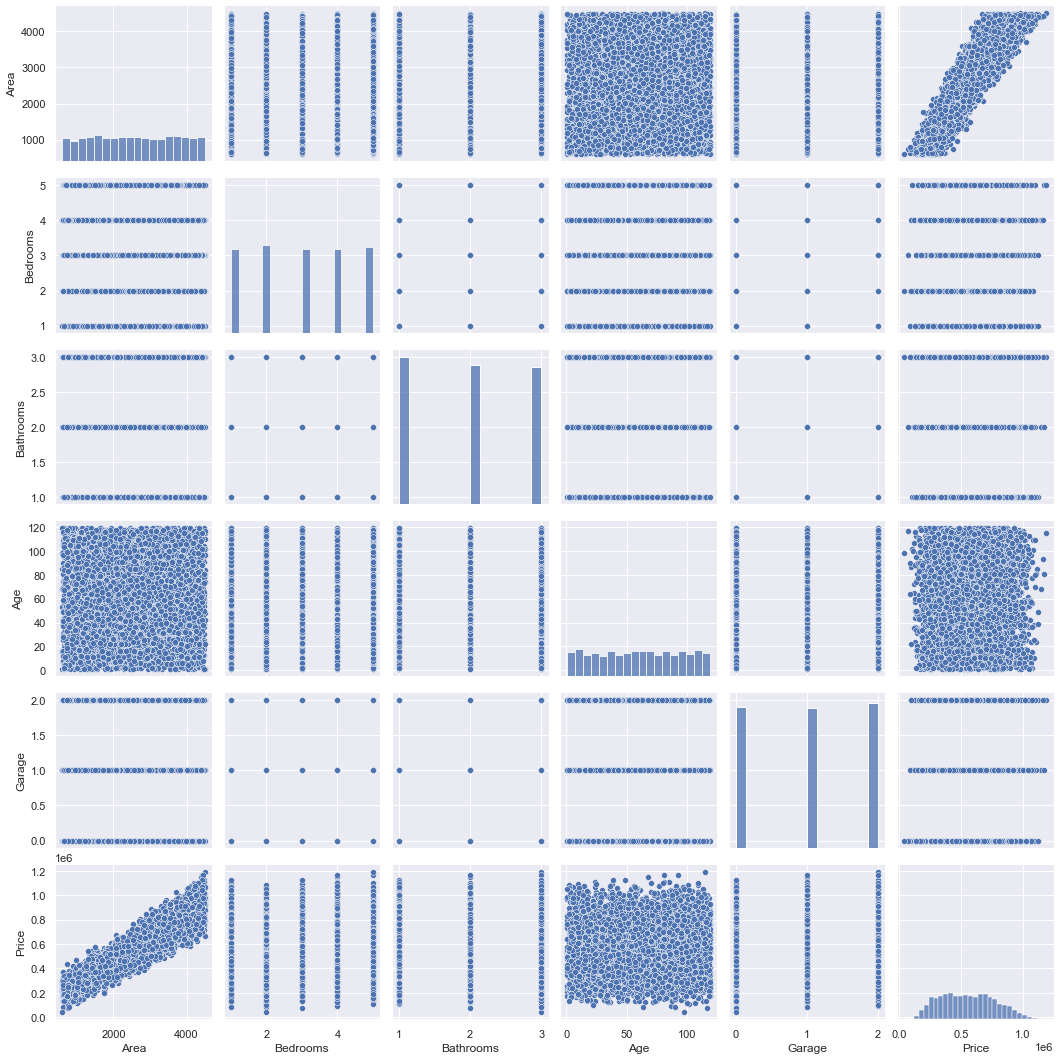

Area         0
Bedrooms     0
Bathrooms    0
Location     0
Age          0
Garage       0
Price        0
dtype: int64

In [5]:
sns.pairplot(df, kind='scatter')
plt.show()

## Feature Engineering

We will perform One-Hot Encoding on the 'Location' column as it's a categorical variable.

In [7]:
encoder = OneHotEncoder(sparse=False)
location_encoded = encoder.fit_transform(df[['Location']])
df_encoded = pd.concat([df.drop('Location', axis=1), pd.DataFrame(location_encoded, columns=encoder.get_feature_names_out())], axis=1)
df_encoded.head()

,Area,Bedrooms,Bathrooms,Age,Garage,Price,Location_Location1,Location_Location2,Location_Location3,Location_Location4,Location_Location5
0,3774,4,2,23,0,814142.617182,0.0,0.0,1.0,0.0,0.0
1,4107,2,2,46,0,836259.082065,0.0,0.0,1.0,0.0,0.0
2,1460,3,3,113,1,296721.573960,0.0,1.0,0.0,0.0,0.0
3,1894,5,2,30,0,399099.591046,1.0,0.0,0.0,0.0,0.0
4,1730,3,2,67,0,441862.941002,0.0,0.0,0.0,0.0,1.0


## Model Selection

We select the Decision Tree Regressor as our model.

## Training and Evaluation

Let's split our data into training and testing sets, train our model, and evaluate its performance.

In [32]:
df_encoded = df.copy()

In [33]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting and evaluating
y_pred = dt_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 56526.84369325241


In [9]:
dt_model.predict([3337, 4, 2, 45, 1])

C:\Users\TiOluwani\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[3.337e+03 4.000e+00 2.000e+00 4.500e+01 1.000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Model Tuning

Based on the initial performance, further tuning of the model can be performed to improve its accuracy.